# Importieren der Module

Um die Pakete verwenden zu können müssen sie zunächst eingeladen werden. Dies erfolgt in Python mit dem import Befehl.
    

In [1]:
import os                             # operating system functionality
import numpy as np                    # arrays and math
import matplotlib.pyplot as plt       # plotting
from IPython.display import SVG       # showing svg

import ppm                            # python panel methode package
from ppm.vtk_export import VtkWriter  # export to vtk file format
from ppm.utils import check_path      # check path and create directory
import ppm.pan2d as pan2d             # 2d panel-methods and solution-elements
import ppm.pan3d as pan3d             # 3d panel-methodes and solution-elements

In [2]:
def paraview(_file=None):
    """open a vtk-file in paraview."""
    if not _file:
        command = "paraview"
    else:
        command = "paraview " + _file
    os.system(command)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#Basis Objekte
Das Basis-Objekt für die Panelmethode kann ein 2d- oder 3d-"Berechnungsfall" (**Case2**, **Case3**) sein. Diesem wird die Geometrie bestehend aus mehren  Flächen (**Panel2**, **Panel3**) vorgegeben. Diese sind planare Flächen bzw. im 2D Fall Linien, die aus mehreren Punkten  (**PanelVector2**, **PanelVector3**) gebildet werden, welche Vektoren (**Vector2**, **Vector3**) mit weiteren Parametern sind.

##Vector2 & Vector3
**Vector2** und **Vector3** repräsentieren Eigen::Vector2d bzw Eigen::Vector3d in Python. Diese besitzten einige hilfreiche Funktionen. Einige davon werden hier gezeigt:

In [3]:
from __future__ import division       # enable python3 division
v1 = ppm.Vector2(0, -1)
v2 = ppm.PanelVector2(0, 1)
v3 = ppm.Vector3(0, 0, 1)
v4 = ppm.PanelVector3(1, 0, 1)

###Basis Operatoren

In [4]:
print(v1 + v2)
print(v2 - v1)
print(v1 * 2)
print(v1 / 2)
v1 += v2
v1 -= v2
v1 *= 2
v1 /= 2

Eigen::Vector2(0, 0)
Eigen::Vector2(0, 2)
Eigen::Vector2(0, -2)
Eigen::Vector2(0, -0.5)


###Skalar- / Kreuzprodukt

In [5]:
print(v1.dot(v1))
print(v3.dot(v4))
print(v3.cross(v3))
print(v3.cross(v4))

1.0
1.0
Eigen::Vector3(0, 0, 0)
Eigen::Vector3(0, 1, 0)


###2d $\longleftrightarrow$ 3d
Es ist möglich einen 2d Vektor in einen 3d Vektor umszuwandeln, sowie umgekehrt. Die Operatoren können aber immer nur auf Vektoren der glchen Dimension angewendet werden.

In [6]:
print(ppm.Vector3(v1))
print(ppm.Vector2(v3))

Eigen::Vector3(0, -1, 0)
Eigen::Vector2(0, 0)


###Länge und Normalenrichtung

In [7]:
print(v1.norm())
print(abs(v1))
print(v1.normal)

1.0
1.0
Eigen::Vector2(1, 0)


##Panel2
Das **Panel2** besteht aus 2 Punkten der Klasse **PanelVector2**. Einige in der Panelmethode öfter benutzte Eigenschaften werden direkt als Attribute im Panel gespeichert. Dies sind zum Beispiel die Länge **l**, die Ausrichtung **n, t** und der Mittelpunkt **center**.

In [8]:
l = [ppm.PanelVector2(1, 2), ppm.PanelVector2(3, 4)]
p = ppm.Panel2(l)
p.l, p.t, p.n, p.center

(2.8284271247461903,
 Eigen::Vector2(-0.707107, -0.707107),
 Eigen::Vector2(-0.707107, 0.707107),
 Eigen::Vector2(2, 3))

##Panel3
Das Panel3 besteht aus 3 oder mehr Punkten der Klasse **PanelVector3**. Einige in der Panelmethode öfter benutzte Eigenschaften werden direkt als Attribute im Panel gespeichert. Dies sind zum Beispiel die Fläche **area**, die Ausrichtung **n, m, l** und der Mittelpunkt **center**.

In [9]:
l = [ppm.PanelVector3(1, 2, 0), 
     ppm.PanelVector3(3, 4, 1), 
     ppm.PanelVector3(0, -1, 0)]
p = ppm.Panel3(l)
p.area, p.n, p.l, p.m, p.center

(2.5495097567963922,
 Eigen::Vector3(-0.588348, 0.196116, 0.784465),
 Eigen::Vector3(-0.57735, 0.57735, -0.57735),
 Eigen::Vector3(-0.566139, -0.792594, -0.226455),
 Eigen::Vector3(1.33333, 1.66667, 0.333333))

##Einflussfunktionen

Die Einflussfunktionen stellen die Kernfunktionen für die Panel Methode dar. Sie sind alle Lösungen der Laplace Gleichung und werden in Potential- und Geschwindigkeitsfunktionen (**v**) unterschieden. Die ersten zwei Argumente für diese Funktionen sind der Zielpunkt (**target**) und das Störungsobjekt (**source**).


Die Einflussfunktionen können aus dem Paket pan2d bzw. pan3d geladen werden.


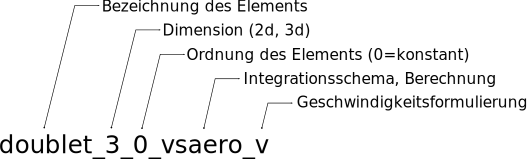

In [10]:
SVG(filename='tutorial_files/kernfunktionen_bezeichnung.svg') 

In [11]:
import ppm.pan2d as pan2d

target = ppm.Vector2(1, 1)
source_point = ppm.PanelVector2(-1, 0)
source_point_1 = ppm.PanelVector2(1, 0)
source_panel = ppm.Panel2([source_point, source_point_1])

print(pan2d.source_2(target, source_point))
print(pan2d.doublet_2(target, source_point, ppm.Vector2(1, 0)))
print(pan2d.doublet_2_0(target, source_panel))
print(pan2d.doublet_2_0_v(target, source_panel))

0.128074999682
-0.0636619772368
-0.176208191175
Eigen::Vector2(0.127324, 0.063662)


##Case
Der **Case** stellt einen "Berechnungsfall" dar in dem eine Rand-Integral-Gleichung aufgestellt und das daraus resultierende Gleichungssystem gelöst wird. Die berechneten Werte werden am Panel gesetzt und die Kräfte und Momente werden aufsummiert.

Die Berechnungsfälle können aus dem Paket pan2d bzw. pan3d geladen werden.

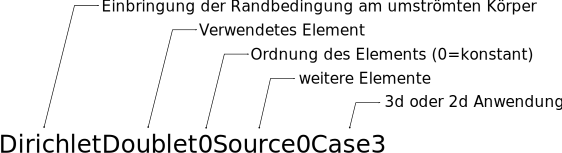

In [12]:
SVG(filename='tutorial_files/Case_bezeichnung.svg') 

#Zylinderumströmung mittels Neumannrandbedingung und konstanten Quellenpanels

* Erstellen der Geometrie (numpy)

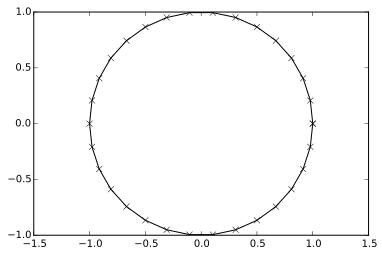

In [13]:
phi = np.linspace(0, 2 * np.pi, 30 + 1)
x = np.cos(phi)[:-1]
y = np.sin(phi)[:-1]
xy = np.transpose(np.array([x, y]))

plt.figure(figsize=(6,4))
plt.axes().set_aspect("equal", "datalim")
plt.plot(list(x) + [x[0]], list(y) + [y[0]], marker="x", c="black")
plt.show()

* Erstellen der **Panels** aus den Geometriedaten (ppm)

In [14]:
points = [ppm.PanelVector2(x, y) for x, y in xy]
points += [points[0]]
panels = [ppm.Panel2([point, points[i+1]]) 
          for i, point in enumerate(points[:-1])]

* Erstellen eines **Case**

In [15]:
case = pan2d.NeumannDoublet0Case2(panels)
case.v_inf = ppm.Vector2(1, 0)
case.run()

* Visualisierung der berechneten Werte

('lift: ', -2.6367796834847468e-15)


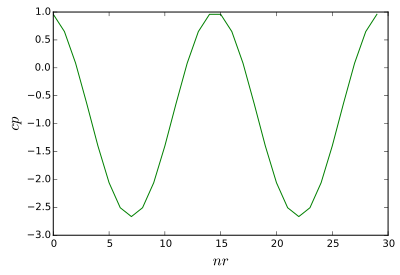

In [16]:
print("lift: ", case.cl)     # no lift because no wake was created
plt.figure(figsize=(6,4))
plt.plot([p.cp for p in panels], c="g")
plt.ylabel("$cp$", fontsize=15)
plt.xlabel("$nr$", fontsize=15)
plt.show()

In [17]:
nx = 200
ny = 200
space_x = np.linspace(-2, 2, nx)
space_y = np.linspace(-2, 2, ny)
grid = [ppm.Vector2(x, y) for y in space_y for x in space_x]

velocity = list(map(case.off_body_velocity, grid))
pot = list(map(case.off_body_potential, grid))

file_name = check_path("/tmp/ppm_results/cylinder/field.vtk")
with open(file_name, "w") as _file:
    writer = VtkWriter()
    writer.structed_grid(_file, "cylinder", [nx, ny, 1])
    writer.points(_file, grid)
    writer.data(_file, velocity, name="velocity",
                _type="VECTORS", data_type="POINT_DATA")
    writer.data(_file, pot, name="pot", 
                _type="SCALARS", data_type="POINT_DATA")

paraview(file_name)

# Zylinder Umströmung durch Überlagerung eines Dipols mit einer Parallel-Strömung

In [18]:
from ppm.pan2d import doublet_2, doublet_2_v, vortex_2, vortex_2_v


source = ppm.Vector2(0, 0)                 # center of the circle

def cylinder_field(target, circulation=0, r=1, v_inf=ppm.Vector2(1, 0)):
    
    direction = ppm.Vector2(-1, 0)         # direction of doublet (-v_inf)
    mu = v_inf.norm() * 2 * np.pi * r**2   # solve mu * doublet_2_v(t, s) + v_vinf == 0
    return (
            # potential influence
            mu * doublet_2(target, source, -v_inf) + 
            v_inf.dot(target) + vortex_2(target, source, direction) * circulation,
            
            # velocity influence
            mu * doublet_2_v(target, source, -v_inf) + 
            v_inf + vortex_2_v(target, source) * circulation
        )
def cp(velocity, v_inf=ppm.Vector2(1, 0)):
    return 1 - velocity.dot(velocity) / v_inf.dot(v_inf)    

## Druckverteilung an der Oberfläche

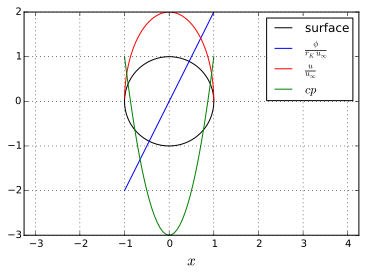

In [19]:
phi = np.linspace(0, np.pi * 2, 100)
x = list(np.cos(phi) + source.x)
y = list(np.sin(phi) + source.y)
xy = list(zip(x, y))
pot, vel = zip(*[cylinder_field(ppm.Vector2(xi, yi)) for xi, yi in xy])
_cp = list(map(cp, vel))
vel = [v.norm() for v in vel]

plt.figure(figsize=(6,4))
plt.axes().set_aspect("equal", "datalim")
plt.grid()
plt.plot(x, y, label="surface", color="black")
plt.plot(x, pot, label="$\\frac{\phi}{r_K u_{\infty}}$", color="b")
plt.plot(x, vel, label="$\\frac{u}{u_{\infty}}$", color="r")
plt.plot(x, _cp, label="$cp$", color="g")
plt.xlabel("$x$", fontsize=15)
plt.xlim(-2, 3)
plt.legend()
plt.show()

## Potential- und Geschwindigkeitsverteilung im Raum

In [20]:
x_grid = np.linspace(-2, 2, 100)
y_grid = np.linspace(-2, 2, 100)
grid = [ppm.Vector2(x, y) for x in x_grid for y in y_grid]
pot, vel = zip(*[cylinder_field(point) for point in grid])
writer = VtkWriter()

filename = check_path("/tmp/ppm_results/cylinder.vtk")
with open(filename, "w") as _file:
    writer = VtkWriter()
    writer.structed_grid(_file, "z_plane", [100, 100, 1])
    writer.points(_file, grid)
    writer.data(_file, pot, name="potential", 
                _type="SCALARS", data_type="POINT_DATA")
    writer.data(_file, vel, name="velocity", 
                _type="VECTORS", data_type="POINT_DATA")
paraview(filename)

# Joukowsky Profil - konforme Abbildung
## Druckverteilung an der Oberfläche eines Joukowsky Profil mittels konformer Abbildung.

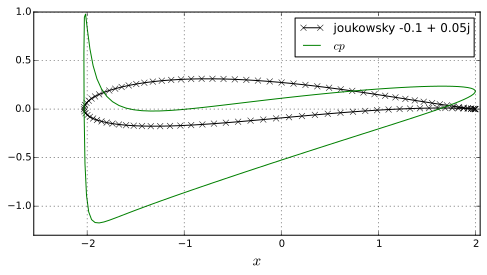

In [21]:
from ppm.airfoil.conformal_mapping import JoukowskyAirfoil
airfoil = JoukowskyAirfoil(midpoint=-0.1 + 0.05j)

alpha = np.deg2rad(3)

vel = airfoil.surface_velocity(alpha, num=70)
vel = np.sqrt(vel.imag ** 2 + vel.real ** 2)
cp = airfoil.surface_cp(alpha, num=100)
coordinates = airfoil.coordinates(100)

plt.figure(figsize=(8,4))
plt.grid()
plt.axes().set_aspect("equal", "datalim")
plt.plot(coordinates.real, coordinates.imag, 
         label="joukowsky -0.1 + 0.05j", c="black", marker="x")
plt.plot(coordinates.real, cp, label="$cp$", c="g")
plt.legend()

plt.ylim(-1.3, 1.)
plt.xlabel("$x$", fontsize=15)
plt.show()

# Joukowsky Profil - 2D Panelmethode
## Druckverteilung an der Oberfläche

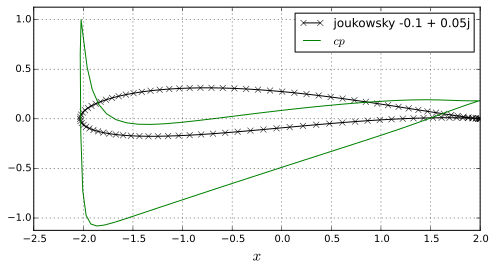

In [22]:
# translate the complex coordinates to (x, y) coordinates
coordiantes = list(zip(
        airfoil.coordinates(num=70).real, 
        airfoil.coordinates(num=70).imag))
vertices = [ppm.PanelVector2(*v) for v in coordiantes[:-1]]
vertices[0].wake_vertex = True
panels = [ppm.Panel2([vertices[i], 
                      vertices[i + 1]]) 
          for i in range(len(vertices[:-1]))]
panels.append(ppm.Panel2([vertices[-1], vertices[0]]))

case = pan2d.DirichletDoublet0Source0Case2(panels)
case.v_inf = ppm.Vector2(np.cos(alpha), np.sin(alpha))
case.run()

pan_center_x = [panel.center.x for panel in panels]
pan_vel = [panel.velocity.norm() for panel in panels]
pan_cp = [panel.cp for panel in panels]

plt.figure(figsize=(8,4))
plt.grid()
plt.axes().set_aspect("equal", "datalim")
plt.plot(coordinates.real, coordinates.imag, 
         label="joukowsky -0.1 + 0.05j", c="black", marker="x")
plt.plot(pan_center_x, pan_cp, label="$cp$", c="g")
plt.legend()

plt.ylim(-1.5, 1.5)
plt.xlabel("$x$", fontsize=15)
plt.show()

## Potential- und Geschwindigkeitsverteilung im Raum

In [23]:
nx = 200
ny = 200
space_x = np.linspace(-3, 3, nx)
space_y = np.linspace(-1, 1, ny)
grid = [ppm.Vector2(x, y) for y in space_y for x in space_x]

velocity = list(map(case.off_body_velocity, grid))
pot = list(map(case.off_body_potential, grid))

file_name = check_path("/tmp/ppm_results/airfoil_2d_linear/field.vtk")
with open(file_name, "w") as _file:
    writer = VtkWriter()
    writer.structed_grid(_file, "airfoil", [nx, ny, 1])
    writer.points(_file, grid)
    writer.data(_file, velocity, name="velocity", 
                _type="VECTORS", data_type="POINT_DATA")
    writer.data(_file, pot, name="pot", _type="SCALARS", 
                data_type="POINT_DATA")

paraview(file_name)

# Umströmung einer Kugel
## Überlagerung eines Dipols und einer Parallelströmung

In [24]:
from ppm.pan3d import doublet_3, doublet_3_v


def sphere_field(target, r=1, v_inf=ppm.Vector3(1, 0, 0)):
    source = ppm.Vector3(0, 0, 0)
    mu = v_inf.norm() * np.pi * r**3 * 2
    return (
        mu * doublet_3(target, source, -v_inf) + v_inf.dot(target),
        mu * doublet_3_v(target, source, -v_inf) + v_inf
        )
def cp_(velocity, v_inf=ppm.Vector3(1, 0, 0)):
    return 1 - velocity.dot(velocity) / v_inf.dot(v_inf)  

## Potential- und Geschwindigkeitsverteilung im Raum

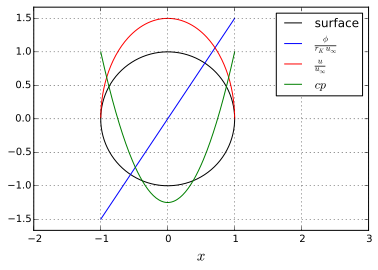

In [25]:
phi = np.linspace(0, np.pi * 2, 300)
x = np.cos(phi)
y = np.sin(phi)
pot, vel = zip(*[sphere_field(
            ppm.Vector3(
                np.cos(p), 
                np.sin(p),
                0)) for p in phi])
cp = list(map(cp_, vel))
vel = [v.norm() for v in vel]

plt.figure(figsize=(6,4))

plt.plot(x, y, label="surface", color="black")
plt.plot(x, pot, label="$\\frac{\phi}{r_K u_{\infty}}$", color="b")
plt.plot(x, vel, label="$\\frac{u}{u_{\infty}}$", color="r")
plt.plot(x, cp, label="$cp$", color="g")


plt.grid()
plt.axes().set_aspect("equal", "datalim")
plt.xlabel("$x$", fontsize=15)
plt.xlim(-2, 3)
plt.legend()
plt.show()

In [26]:
nx, ny, nz = 30, 30, 30

x_grid = np.linspace(-2, 2, nx)
y_grid = np.linspace(-2, 2, ny)
z_grid = np.linspace(-2, 2, nz)
grid = [ppm.Vector3(x, y, z)for z in z_grid
                            for y in y_grid 
                            for x in x_grid]
pot, vel = zip(*[sphere_field(point) for point in grid])
writer = VtkWriter()

filename = check_path("/tmp/ppm_results/sphere.vtk")
with open(filename, "w") as _file:
    writer = VtkWriter()
    writer.structed_grid(_file, "points", [nx, ny, nz])
    writer.points(_file, grid)
    writer.data(_file, pot, name="potential", 
                _type="SCALARS", data_type="POINT_DATA")
    writer.data(_file, vel, name="velocity", 
                _type="VECTORS", data_type="POINT_DATA")

paraview(filename)

# 3D Panelmethode Kugel

In [27]:
from ppm.mesh import mesh_object
from ppm.vtk_export import CaseToVTK

# create panels from mesh
mesh = mesh_object.from_OBJ("../../ppm_tests/mesh/sphere_low_tri.obj")

# create case from panels
case = pan3d.DirichletDoublet0Case3(mesh.panels)

# set boundary conditon far away from the body
case.v_inf = ppm.Vector3(1, 0, 0.)

# solve for constant potential inside the object
case.run()

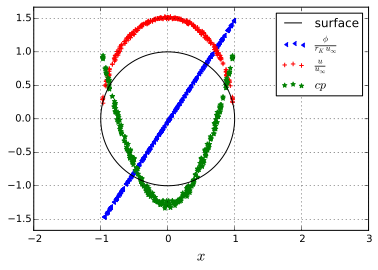

In [28]:
center_x, surf_vel, surf_cp, surf_pot = [], [], [], []
for panel in case.panels:
    center_x.append(panel.center.x)
    surf_vel.append(panel.velocity.norm())
    surf_cp.append(panel.cp)
    surf_pot.append(panel.potential)

phi = np.linspace(0, np.pi * 2, 300)
x = np.cos(phi)
y = np.sin(phi)
    
plt.figure(figsize=(6,4))

plt.plot(x, y, label="surface", color="black")
plt.scatter(center_x, surf_pot, marker=4, color="b", label="$\\frac{\phi}{r_K u_{\infty}}$")
plt.scatter(center_x, surf_vel, marker="+", color="r", label="$\\frac{u}{u_{\infty}}$")
plt.scatter(center_x, surf_cp, marker="*", color="g", label="$cp$")


plt.grid()
plt.axes().set_aspect("equal", "datalim")
plt.xlabel("$x$", fontsize=15)
plt.xlim(-2, 3)
plt.legend()
plt.show()

In [29]:
lin = np.linspace(-0.5, 0.5, 5)
grid = [[-2, k, j] for j in lin for k in lin]

file_name = "/tmp/ppm_results/sphere_case"
vtk_writer = CaseToVTK(case, file_name)
vtk_writer.write_panels(data_type="cell")
vtk_writer.write_field([-2, 2, 20], [-2, 2, 20], [-2, 2, 20])

paraview(file_name + "/panels.vtk")

# Umströmung eines Gleitschirms
## Erstellen des "Case"

In [30]:
from openglider.jsonify import load
from openglider.airfoil import Profile2D
from openglider.glider.in_out.export_3d import ppm_Panels

from ppm.utils import vinf_deg_range3


# load glider
file_name = "../../ppm_tests/openglider/glider/referenz_schirm_berg.json"
with open(file_name) as _file:
    glider_2d = load(_file)["data"]
    glider_2d.set_const_cell_dist()
    glider = glider_2d.get_glider_3d()

# create the panels and get the trailing edge
_, panels, trailing_edge = ppm_Panels(
    glider,
    midribs=0,
    profile_numpoints=80,
    distribution=Profile2D.nose_cos_distribution(0.2),
    num_average=0,
    symmetric=True)

# setup the case with panels and trailing edge
case = pan3d.DirichletDoublet0Source0Case3(panels, trailing_edge)

# set the boundarycondition far away from the wing
case.v_inf = ppm.Vector3(*glider_2d.v_inf)

# create the wake (length, number of wake panels per column)
case.create_wake(length=10000, count=10)

# set reference values
case.mom_ref_point = ppm.Vector3(1.25, 0, -5)
case.A_ref = glider_2d.flat_area

# set farfield-factor
case.farfield = 5

# chooce between "on_body" or "trefftz"
case.drag_calc = "on_body"

# if "trefftz" is used, this point represents the position of the trefftz-plane
case.trefftz_cut_pos = case.v_inf * 100

# run the case with fixed wake for different aoa (v_inf)
polars = case.polars(vinf_deg_range3(case.v_inf, -15, 15, 10))

## Polaren

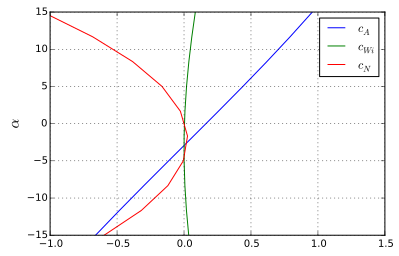

In [31]:
cL, cD, cP = [], [], []
alpha = []
for i in polars.values:
    alpha.append(np.rad2deg(i.alpha))
    cL.append(i.cL)
    cD.append(i.cD)
    cP.append(i.cP)
    
plt.figure(figsize=(6,4))
plt.ylabel("$\\alpha$", fontsize=15)
plt.plot(cL, alpha)
plt.plot(cD, alpha)
plt.plot(cP, alpha)
plt.legend(["$c_A$", "$c_{Wi}$", "$c_N$"])

plt.xlim(-1,1.5)
plt.grid()
plt.show()

## Visualisierung

In [32]:
file_name = "/tmp/ppm_results/vtk_glider_case"
vtk_writer = CaseToVTK(case, file_name)
vtk_writer.write_panels(data_type="cell")
vtk_writer.write_wake_panels()
vtk_writer.write_body_stream(panels, 100)
paraview(file_name + "/panels.vtk")